In [1]:
from google.colab import files
uploaded = files.upload()

Saving artcellSongs.txt to artcellSongs (1).txt


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
data = open('/content/artcellSongs.txt').read()

In [4]:
data

"নোনা স্বপ্নে গড়া\nতোমার স্মৃতি\nশত রঙে রাঙিয়ে মিথ্যে\nকোনো স্পন্দন\nআলোর নিচে যে আঁধার\nখেলা করে\nসে আঁধারে শরীর মেশালে\nহে...\n\nনোনা স্বপ্নে গড়া\nতোমার স্মৃতি\nশত রঙে রাঙিয়ে মিথ্যে\nকোনো স্পন্দন\nআলোর নিচে যে আঁধার\nখেলা করে\nসে আঁধারে শরীর মেশালে\nহে...\n\nআজ আমি ধূসর কি রঙিন\nসময়ে\nপথ হারাই তোমাতে\nজীবনের কাঁটা তারে তুমি\nঅন্ত্যমিলের\nঅপূর্ণতায়\nবেওয়ারিশ ঘুড়ি উড়ে\nযাও অনাবিল\nআকাশের শূণ্যতায়\nতবু আমি...\n\nকী খুঁজি মানুষের\nবিষাদের চোখে\nকোথায় আলোর উৎসবে\nস্বপ্নের প্রতিবিম্ব\nভাঙে\nএকা একা আমি থাকি\nদাঁড়ায়ে\nস্মৃতির ঝড়ো বাতাসে\nদু'জনার শরীর মেশাই\nকী খুঁজি মানুষের\nবিষাদের চোখে\nকোথায় আলোর উৎসবে\nস্বপ্নের প্রতিবিম্ব\nভাঙে\nএকা একা আমি থাকি\nদাঁড়ায়ে\nস্মৃতির ঝড়ো বাতাসে\nদু'জনার শরীর মেশাই\n\nআজ আমি ধূসর কি রঙিন\nসময়ে\nপথ হারাই তোমাতে\nজীবনের কাঁটা তারে তুমি\nঅন্ত্যমিলের\nঅপূর্ণতায়\nবেওয়ারিশ ঘুড়ি উড়ে\nযাও অনাবিল\nআকাশের শূণ্যতায়\n\nজীবনের কাঁটা তারে তুমি\nঅন্ত্যমিলের\nঅপূর্ণতায়\nবেওয়ারিশ ঘুড়ি উড়ে\nযাও অনাবিল\nআকাশের শূণ্যতায়\n\nতবু আমি...\nআমার অবারিত দরজা

In [5]:
tokenizer = Tokenizer()
corpus = data.split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 120))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(total_words/2, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         111600    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 300)         325200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 240)               404160    
_________________________________________________________________
dense (Dense)                (None, 465)               112065    
_________________________________________________________________
dense_1 (Dense)              (None, 930)               433380    
Total params: 1,386,405
Trainable params: 1,386,405
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
62/62 [==============================] - 1s 11ms/step - loss: 6.6442 - accuracy: 0.0122
Epoch 2/150
62/62 [==============================] - 1s 11ms/step - loss: 6.2062 - accuracy: 0.0148
Epoch 3/150
62/62 [==============================] - 1s 11ms/step - loss: 6.0285 - accuracy: 0.0127
Epoch 4/150
62/62 [==============================] - 1s 11ms/step - loss: 5.8265 - accuracy: 0.0158
Epoch 5/150
62/62 [==============================] - 1s 11ms/step - loss: 5.6142 - accuracy: 0.0209
Epoch 6/150
62/62 [==============================] - 1s 11ms/step - loss: 5.3764 - accuracy: 0.0240
Epoch 7/150
62/62 [==============================] - 1s 11ms/step - loss: 5.1697 - accuracy: 0.0362
Epoch 8/150
62/62 [==============================] - 1s 11ms/step - loss: 4.9707 - accuracy: 0.0479
Epoch 9/150
62/62 [==============================] - 1s 11ms/step - loss: 4.7796 - accuracy: 0.0561
Epoch 10/150
62/62 [==============================] - 1s 11ms/step - loss: 4.5605 - accuracy: 0.0754

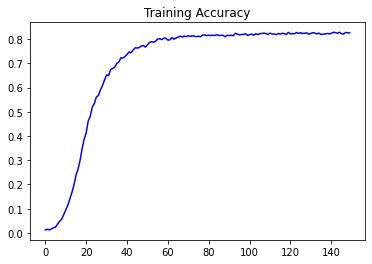

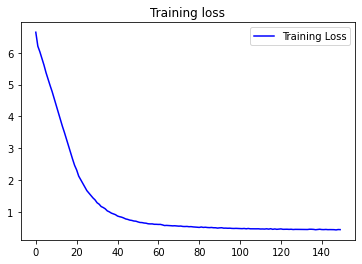

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "আজ"
next_words = 60

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
আজ আমি ধূসর কি রঙিন না পার থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব দূরত্ব পরাজয় থাকা অরব
